# Regression with Keras (Deep Learning with Keras)

## Regression
Regression is a process where a model learns to predict a continuous value output for a given input data,   
  e.g. predict price, length, width, etc.

## Problem Definition
Our objective is to **build prediction model that predicts housing prices from a set of house features.**  
We will use the Boston Housing dataset, which is collected by the U.S Census Service concerning housing in the area of Boston Mass.     
The dataset is small in size with only 506 cases.

It contains 14 features described as follows: 
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per $10,000  

* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

### **The goal behind our regression problem is to use the 13 features to predict the value of MEDV (which represents the housing price).**

## Loading the Data

* Keras has a set of datasets already available. You can access them from *keras.dataset*.

In [1]:
from keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# let us view on sample from the features
print(X_train[0], y_train[0])
#print(X_test[0], y_test[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


The data is returned as two tuples representing the training and testing splits.  
The X_train and X_test contain the feature columns, while the y_train and y_test contain the label/output column.

## Preprocessing
* Our data needs to be rescaled. Time for our buddy (StandarScaler) from the scikit-learn package.

**StandardScaler**  
* Change the mean of each feature to 0, and the variance to 1.  
* All properties will have the same scale.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
# first we fit the scaler on the training dataset
scaler.fit(X_train)

StandardScaler()

In [5]:
# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# a sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [7]:
X_train_scaled.shape

(404, 13)

Note that we only rescale the features and not the label column.  
This dataset is simple and no further preprocessing is needed.

## Building the Model
* We will build the model layer by layer in a sequential manner.  
To do so we have to **import 1) the model class 2) and the layer class**

In [8]:
from keras import models, layers

Then, we create the model:

In [9]:
model = models.Sequential()

And we start adding the layers:

In [10]:
X_train.shape[1]

13

In [11]:
# adding the layers
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

Notice that we only specify the input shape for the first layer, all layers later will know automatically their input shape from the previous one.  
**The activation parameter here specifies the function we want to perform on top of the layer to calculate the output = activation(X * W + bias).**  
Relu is a activation function that is used to break the linearity of the model.

In [12]:
# output layer
model.add(layers.Dense(1))

The output layer is simply a layer with one neuron and linear activation function since we are predicting only one continuous value.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model
* After building the network we need to specify two important things: **1) the optimizer and 2) the loss function.**
* The optimizer is responsible for navigating the space to choose the best model parameters, while the loss function is used by the optimizer to know how to move in the search space.

In [14]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

1) optimizer : RMSprop works fine with its default parameters.  

2) loss function : Mean Squared Error  
    (the average squared error a point is from the mean value)  
    
3) metrics : Mean Absolute Error  
    (Regression Indicators, Absolute value of the difference between the actual value and the measured value,  
    In other words, how wrong the model is in prediction.)

## Model Training
* we just have to call the fit method to start training.
    * validation_split : the validation split indicates that the model has to keep 20% of the data as a validation set
    * epochs : the number of iterations on the data.

In [15]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 6ms/step - loss: 565.0212 - mae: 21.8325 - val_loss: 624.7561 - val_mae: 23.1973
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 549.6344 - mae: 21.5287 - val_loss: 610.9771 - val_mae: 22.9406
Epoch 3/100
11/11 [==============================] - 0s 961us/step - loss: 537.2485 - mae: 21.2825 - val_loss: 597.1677 - val_mae: 22.6825
Epoch 4/100
11/11 [==============================] - 0s 926us/step - loss: 524.7267 - mae: 21.0289 - val_loss: 582.7738 - val_mae: 22.4080
Epoch 5/100
11/11 [==============================] - 0s 943us/step - loss: 511.8459 - mae: 20.7557 - val_loss: 568.0921 - val_mae: 22.1225
Epoch 6/100
11/11 [==============================] - 0s 952us/step - loss: 498.3824 - mae: 20.4734 - val_loss: 551.0344 - val_mae: 21.7893
Epoch 7/100
11/11 [==============================] - 0s 937us/step - loss: 483.5116 - mae: 20.1565 - val_loss: 534.4880 - val_mae: 21.4570
Epoch 8/100
11/11 [============

* Let us plot the training and validation error convergence according to the epoch number:

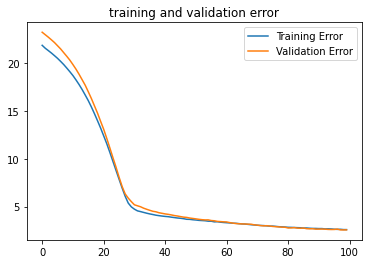

In [16]:
import matplotlib.pyplot as plt

training_error = history.history['mae'] # training error
val_error = history.history['val_mae'] # validation error

plt.plot(training_error)
plt.plot(val_error)
plt.title('training and validation error')
plt.legend(['Training Error', 'Validation Error'], loc='upper right')

plt.show()

We started with an error of 20K per prediction, and went down to around 3K.  
This is a very acceptable error value for a housing price.

## Evaluation on Test Data
* Model evaluation is super easy in Keras. Check the following:

In [17]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 391us/step - loss: 22.6691 - mae: 3.2405


[22.669069290161133, 3.240532636642456]

The output values represent the loss (Mean Squarred Error) and the metrics (Mean Absolute Error).

## Model Prediction
* Using the model for prediction is simpler than you expect. Have a look:

In [18]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]
#print(to_predict)

# we call the predict method
predictions = model.predict(to_predict)

# print the predictions
print(predictions)

# print the real values
print("-------------")
print(y_train[:2])

[[16.16263 ]
 [40.133457]]
-------------
[15.2 42.3]


* References  
    - Regression with Keras (Deep Learning with Keras – Part 3)  
    https://www.marktechpost.com/2019/06/17/regression-with-keras-deep-learning-with-keras-part-3/
    - StandardScaler  
    https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling